# Instantiating a Financial Instrument Class
Instantiation. Creating a class speeds up the process of analysing financial instruments as we can customise attributes and results

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use ('seaborn')

In [2]:
# Defining a class by its name. Spaces between names not allowed, neither are separators like underscore _
# Each word starts with upper case letter conventionally
class FinancialInstrument():
    pass 

In [3]:
# pass means we do not want the class to do anything. it is the simplest attribute

In [4]:
# Instantiating FinancialInstrument object
stock = FinancialInstrument()

In [5]:
stock

In [6]:
# Since we have no attributes in our class, we are getting this result

# The dunder __init__ () method

In [7]:
# Creating instance and basic properties using dunder (double under(underscores)) __init__ method 
# initialiser is the very first property of our class object. Parameters can be entered within the init paranthesis
# Very first parameter is always the self parameter
class FinancialInstrument():
    def __init__(self, ticker, start, end): # These are the four basic parameters we want
        self.ticker = ticker
        self.start = start
        self.end = end

In [8]:
# If shift+tab is pressed now, it can be seen that class FinancialInstrument has three parameters. Self is necessary though
# Self is the placeholder for the variable name that we use
stock = FinancialInstrument('AAPL', '2015-01-01', '2019-12-31')

In [9]:
stock

In [10]:
stock.ticker

'AAPL'

In [11]:
stock.start

'2015-01-01'

In [12]:
stock.end

'2019-12-31'

In [13]:
# In the above examples we have seen the dunder __init__ method work

# The method get_data() to get stock prices from yfinance

In [14]:
# We want to create a class object which downloads stock data from yahoo finance
# Precisely we want the following functionality
yf.download('AAPL', '2015-01-01', '2019-12-31').Close.to_frame().head()
# We wish to download a stock data for given period, then take only the closing prices and save them to a dataframe

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500


In [15]:
# We can store this dataframe into a variable called raw
raw = yf.download('AAPL', '2015-01-01', '2019-12-31').Close.to_frame()

[*********************100%***********************]  1 of 1 completed


In [16]:
# Renaming the Close column as Price in the raw dataframe
# It makes sense to keep the lowercase letters as it removes the ambiguity and hassle when calling an operator later
# Price is more annoying than price as I figured out later
raw.rename(columns = {'Close':'price'}, inplace = True)

In [17]:
raw.head()

,price
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500


In [18]:
# This raw dataframe is the functionality we seek to add to our class
# And we can do so below using self.ticker in place of stock name, self.start & self.end instead of dates

In [19]:
# defining the get_data method in our class
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()  # it is more convenient to put get_data in the instantiation stage
        
        
    def get_data(self): 
        # whenever we define a method that can be called on the object itself, we have to add atleast one parameter i.e.
        # the self parameter, or else we get TypeError
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {'Close':'price'}, inplace = True)
        self.data = raw # saving the dataframe 

In [20]:
# Checking if it works
stock = FinancialInstrument('AAPL', '2015-01-01', '2019-12-31')

[*********************100%***********************]  1 of 1 completed


In [21]:
stock.data

,price
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


# The method log_returns to calculate log returns
It is completely fine to call a method in another method as we did in previous section, where we called method get_data in dunder init method

In [22]:
# We now want to add another column to our Price data: Log returns and include it in instantiation stage itself

In [23]:
# defining the log_returns method in our class
class FinancialInstrument():
    
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def get_data(self): 
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {'Close':'price'}, inplace = True)
        self.data = raw 
        
    def log_returns(self):
        self.data['log_returns'] = np.log(self.data.price/self.data.price.shift(1))

In [24]:
# Checking if a new column is created
stock = FinancialInstrument('AAPL', '2015-01-01', '2019-12-31')

[*********************100%***********************]  1 of 1 completed


In [25]:
stock.data

,price,log_returns
Date,,
2015-01-02,27.332500,NaN
2015-01-05,26.562500,-0.028576
2015-01-06,26.565001,0.000094
2015-01-07,26.937500,0.013925
2015-01-08,27.972500,0.037703
...,...,...
2019-12-23,71.000000,0.016187
2019-12-24,71.067497,0.000950
2019-12-26,72.477501,0.019646


# The (String) Representation method - dunder repr
This method allows us to determine when an instance of a class is represented when display is operanded.
String representation is not required and it does not improve the functionality of our class.
However, it does improve the user experience as users can see at first glance what is inside an object

In [26]:
stock

In [27]:
# 0x20c10128550 is the memory position of object stock. We do not get much useful information when we run stock.
# We need to change that

In [28]:
# defining the dunder repr method in our class to enhance user experience
class FinancialInstrument():
    
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return 'FinancialInstrument(ticker = {}, start = {}, end = {})'.format(self.ticker, self.start, self.end)
# what we are trying to get here is useful information describing key features when stock is run through the class

    def get_data(self): 
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {'Close':'price'}, inplace = True)
        self.data = raw 
        
    def log_returns(self):
        self.data['log_returns'] = np.log(self.data.price/self.data.price.shift(1))

In [29]:
stock = FinancialInstrument('AAPL', '2015-01-01', '2019-12-31')

[*********************100%***********************]  1 of 1 completed


In [30]:
stock

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [31]:
# This is how we want it to look

# The methods plot_data() and plot_returns()
Sometimes visual representation can lead to more intuitive insights so it is always better to include plots in a class

In [32]:
stock

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [33]:
stock.data

,price,log_returns
Date,,
2015-01-02,27.332500,NaN
2015-01-05,26.562500,-0.028576
2015-01-06,26.565001,0.000094
2015-01-07,26.937500,0.013925
2015-01-08,27.972500,0.037703
...,...,...
2019-12-23,71.000000,0.016187
2019-12-24,71.067497,0.000950
2019-12-26,72.477501,0.019646


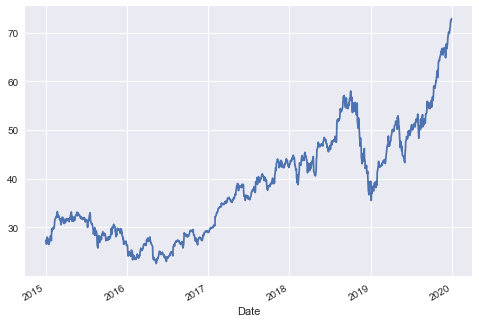

In [34]:
# Creating a price line chart
stock.data.price.plot()
plt.show()

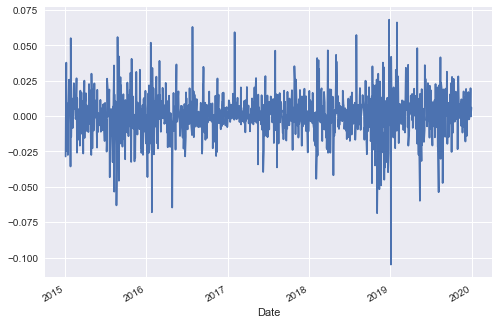

In [35]:
# Creating a log returns line chart
stock.data.log_returns.plot()
plt.show()

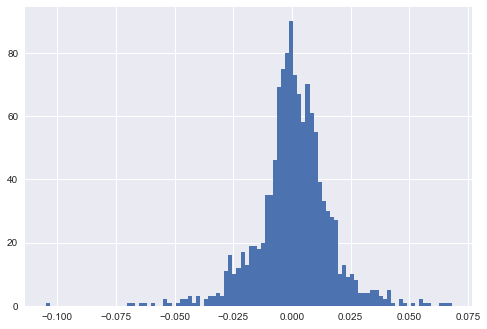

In [36]:
# It is helpful to provide a frequency distribution option for returns
stock.data.log_returns.hist(bins = 100)
plt.show()
# with a histogram we can see at one glance whether the returns are normally distributed or not

In [37]:
# defining the plot prices and plot returns method in our class

class FinancialInstrument():
    
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return 'FinancialInstrument(ticker = {}, start = {}, end = {})'.format(self.ticker, self.start, self.end)

    def get_data(self): 
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {'Close':'price'}, inplace = True)
        self.data = raw 
        
    def log_returns(self):
        self.data['log_returns'] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12,8)) # we need to define the default size of plot
        plt.title('Price Chart: {}'.format(self.ticker), fontsize = 15) # adding a title with placeholder for ticker symbol
        
    def plot_returns(self, kind = 'ts'):  # the default option is set as a time-series plot
# since we have two types of plots for returns available: time series and histogram, we need to give that option here
        if kind == 'ts':
            self.data.log_returns.plot(figsize = (12,8))
            plt.title('Returns: {}'.format(self.ticker), fontsize = 15)
        
        elif kind == 'hist':
            self.data.log_returns.hist(figsize = (12,8), bins = int(np.sqrt(len(self.data))))
# as a thumb rule, the number of bins should be round about equal to the number of observations. Bins must be an integer
# number of rows are the number of timestamps
            plt.title('Frequency of Returns: {}'.format(self.ticker), fontsize = 15)

In [38]:
# Checking if our plot_prices method works
stock = FinancialInstrument('TSLA', '2015-01-01', '2021-08-31')

[*********************100%***********************]  1 of 1 completed


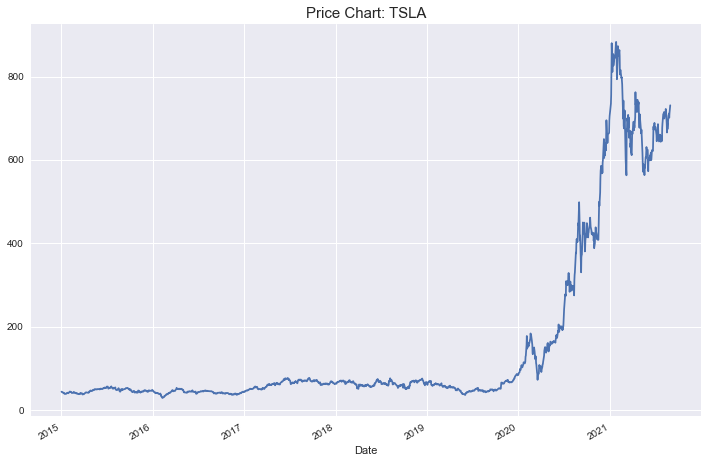

In [39]:
stock.plot_prices()

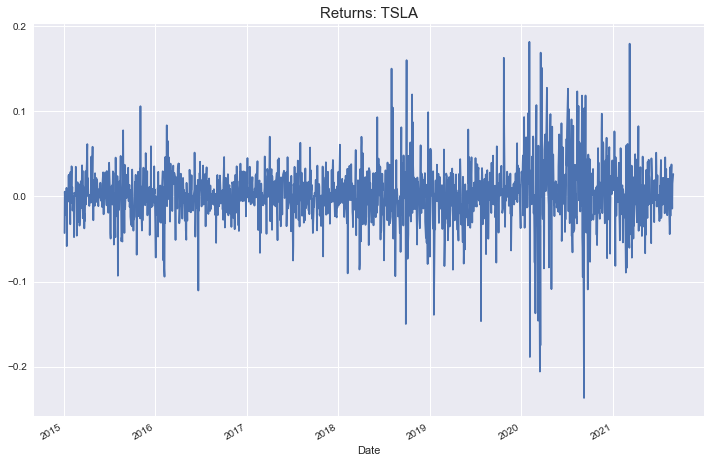

In [40]:
# Plotting returns for our stock
stock.plot_returns()
# a time series plot is displayed because 'ts' is our default parameter

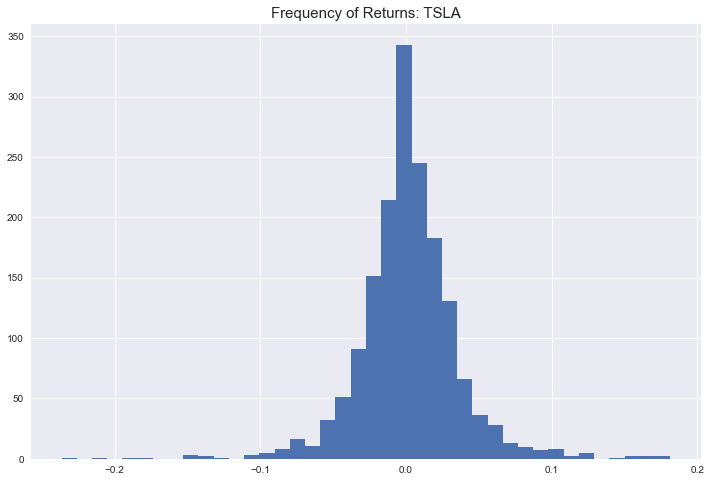

In [41]:
# Plotting the histogram of returns
stock.plot_returns(kind = 'hist')

# Encapsulation and Protected Attributes
A fundamental concept in Object Oriented Programming (OOP)
Encapsulation in a broader sense has two steps:
1. Hiding some attributes by creating a protected attribute using the prefix underscore _ as in self._ticker
2. Creating an official method that allows us to set new values for the protected attribute

In [42]:
stock

FinancialInstrument(ticker = TSLA, start = 2015-01-01, end = 2021-08-31)

In [43]:
stock.ticker

'TSLA'

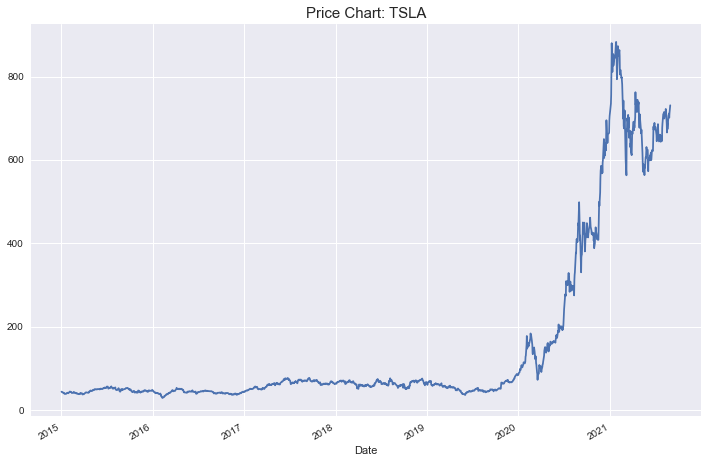

In [44]:
stock.plot_prices()

In [45]:
# Changing our stock ticker to MSFT and observing what happens
stock.ticker = 'MSFT'

In [46]:
stock.ticker

'MSFT'

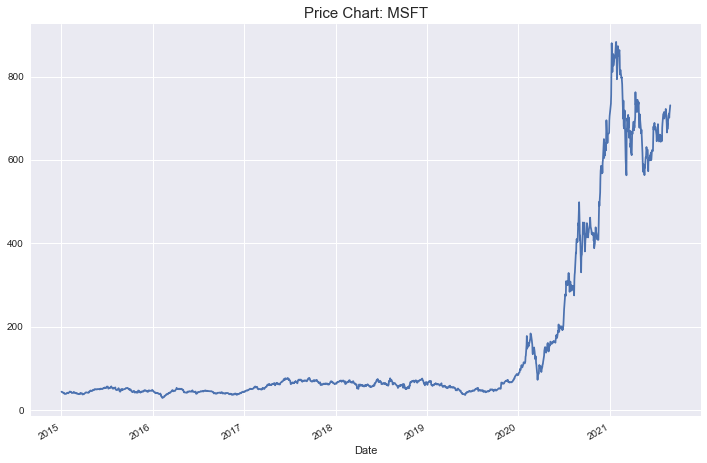

In [47]:
# Plotting prices for MSFT
stock.plot_prices()

In [48]:
# We observe that although the title of the Chart has been changed to MSFT, the price chart is still that of TSLA
# We need to fix this using protected attribute by prefixing the name of an attribute with a single underscore _

In [49]:
# redfining our class using Encapsulation and protected attributes

class FinancialInstrument():
    
    def __init__(self, ticker, start, end):
        self._ticker = ticker # changing self.ticker to self._ticker everywhere
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return 'FinancialInstrument(ticker = {}, start = {}, end = {})'.format(self._ticker, self.start, self.end)

    def get_data(self): 
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {'Close':'price'}, inplace = True)
        self.data = raw 
        
    def log_returns(self):
        self.data['log_returns'] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12,8))
        plt.title('Price Chart: {}'.format(self._ticker), fontsize = 15) 
        
    def plot_returns(self, kind = 'ts'): 
        if kind == 'ts':
            self.data.log_returns.plot(figsize = (12,8))
            plt.title('Returns: {}'.format(self._ticker), fontsize = 15)
        
        elif kind == 'hist':
            self.data.log_returns.hist(figsize = (12,8), bins = int(np.sqrt(len(self.data))))
            plt.title('Frequency of Returns: {}'.format(self._ticker), fontsize = 15)

In [50]:
stock = FinancialInstrument ('BA', '2017-01-01', '2021-08-31')

[*********************100%***********************]  1 of 1 completed


In [51]:
# now we would not get any result for stock.ticker
stock._ticker

'BA'

In [52]:
# in the drop down menu by pressing shift+tab for stock. , we can not find either ticker or protected attribute _ticker
# because the protected attribute is hidden
# The prefix _ is a clear warning to developers and users

# The method set_ticker()
We have created a protected attribute _ticker, but still we want to have an option to change ticker symbol and we can do it with set method. 
It can be any name but we typically use set for methods that set new values to protected properties

In [53]:
# defining the method set_ticker()

class FinancialInstrument():
    
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return 'FinancialInstrument(ticker = {}, start = {}, end = {})'.format(self._ticker, self.start, self.end)

    def get_data(self): 
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {'Close':'price'}, inplace = True)
        self.data = raw 
        
    def log_returns(self):
        self.data['log_returns'] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12,8))
        plt.title('Price Chart: {}'.format(self._ticker), fontsize = 15) 
        
    def plot_returns(self, kind = 'ts'): 
        if kind == 'ts':
            self.data.log_returns.plot(figsize = (12,8))
            plt.title('Returns: {}'.format(self._ticker), fontsize = 15)
        
        elif kind == 'hist':
            self.data.log_returns.hist(figsize = (12,8), bins = int(np.sqrt(len(self.data))))
            plt.title('Frequency of Returns: {}'.format(self._ticker), fontsize = 15)
            
    def set_ticker(self, ticker = None): # If we do not pass any ticker symbol, default parameter is None
# If the ticker is other than None, then we want to change protected attribute self._ticker
        if ticker is not None:
            self._ticker = ticker
# We are essentially overwriting the protected attribute. but this isn't enough because immediately after changing ticker
# we want to download price data for new symbol and log returns. so we do the following
            self.get_data()
            self.log_returns()

In [54]:
# Checking if the method set_ticker() works
stock = FinancialInstrument('MMM', '2015-01-01', '2021-08-31')

[*********************100%***********************]  1 of 1 completed


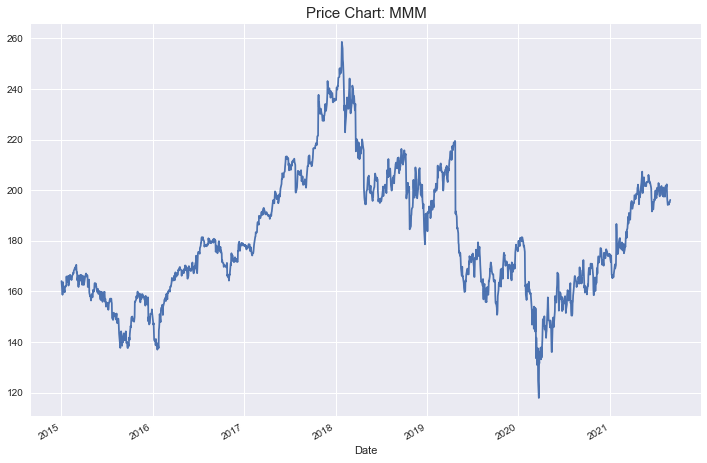

In [55]:
stock.plot_prices()

In [56]:
stock.set_ticker('XOM')

[*********************100%***********************]  1 of 1 completed


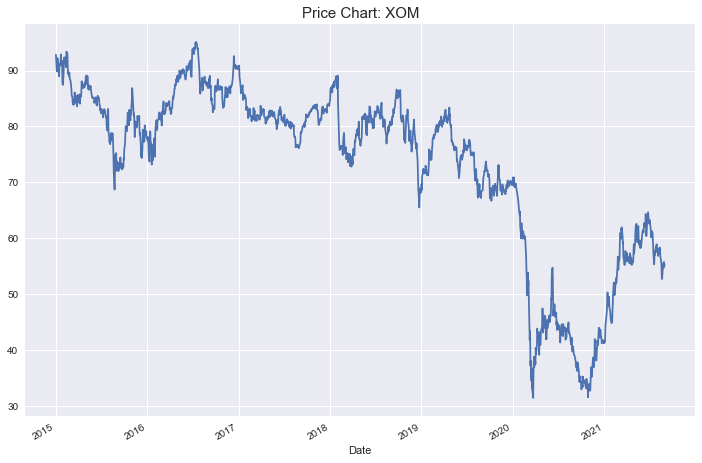

In [57]:
stock.plot_prices()

In [58]:
# As can be seen above, We are able to successfully change ticker and price data using set_ticker

# Adding more methods and performance metrics
Return-Risk metrics. 

In [59]:
# defining the performance metrics methods e.g. mean_return, std_returns, annualized_perf

class FinancialInstrument():
    
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return 'FinancialInstrument(ticker = {}, start = {}, end = {})'.format(self._ticker, self.start, self.end)

    def get_data(self): 
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {'Close':'price'}, inplace = True)
        self.data = raw 
        
    def log_returns(self):
        self.data['log_returns'] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12,8))
        plt.title('Price Chart: {}'.format(self._ticker), fontsize = 15) 
        
    def plot_returns(self, kind = 'ts'): 
        if kind == 'ts':
            self.data.log_returns.plot(figsize = (12,8))
            plt.title('Returns: {}'.format(self._ticker), fontsize = 15)
        
        elif kind == 'hist':
            self.data.log_returns.hist(figsize = (12,8), bins = int(np.sqrt(len(self.data))))
            plt.title('Frequency of Returns: {}'.format(self._ticker), fontsize = 15)
            
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None): # It depends on a situation and size of dataset which frequency we want to take
# by default the frequency is set to daily, so we calculate daily mean 
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
# first, we need to resample the data based on provided frequency, and then take last price of week/month/quarter/year
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
# defining this method is very similar to mean returns
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
# this method calculates annualised risk based on daily data. 252 is taken because there are 252 trading days on avg.
# in an year. Then we round it off to 3 decimal places
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print ('Return: {} | Risk: {}'.format (mean_return, risk))

In [60]:
# Checking to see if our performance metrics methods work
stock = FinancialInstrument('NKE', '2010-01-01', '2021-08-31')

[*********************100%***********************]  1 of 1 completed


In [61]:
# finding monthly mean return 
stock.mean_return('m')

0.016945810825225994

In [62]:
# finding monthly (m) std returns, can calculate annual returns using (y) or (a), quarterly using (q)
stock.std_returns('q')

0.10758203492368486

In [63]:
# Calculating annualised performance
stock.annualized_perf()

Return: 0.2 | Risk: 0.259


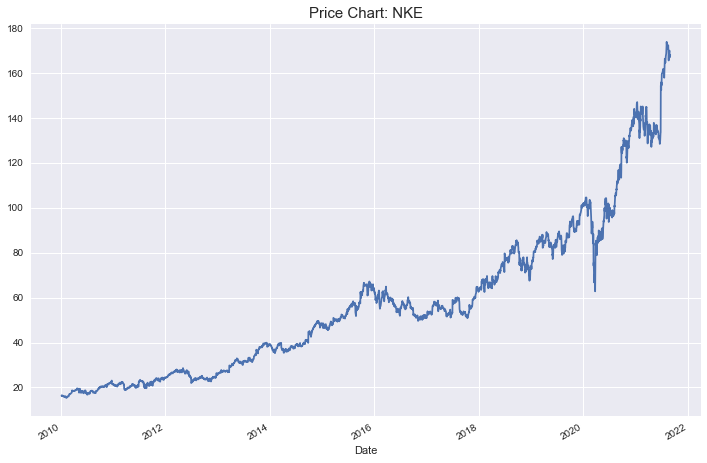

In [64]:
stock.plot_prices()

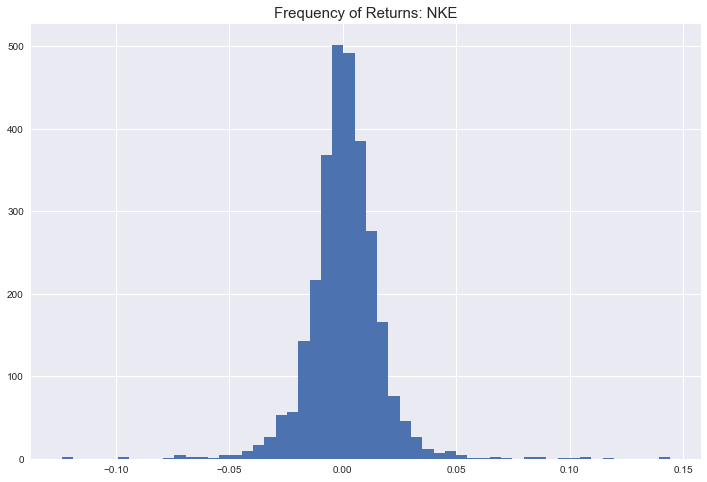

In [65]:
stock.plot_returns(kind = 'hist')

# Inheritance
Sometimes it is beneficial to split one large class into smaller classes to have a more modular structure.
e.g. in our case we can split our class into two classes: FinancialInstrumentBase class and RiskReturn class

In [66]:
# Splitting our big class into two classes for a more modular structure
# FinancialInstrumentBase is the PARENT CLASS
class FinancialInstrumentBase():
    
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return 'FinancialInstrument(ticker = {}, start = {}, end = {})'.format(self._ticker, self.start, self.end)

    def get_data(self): 
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {'Close':'price'}, inplace = True)
        self.data = raw 
        
    def log_returns(self):
        self.data['log_returns'] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12,8))
        plt.title('Price Chart: {}'.format(self._ticker), fontsize = 15) 
        
    def plot_returns(self, kind = 'ts'): 
        if kind == 'ts':
            self.data.log_returns.plot(figsize = (12,8))
            plt.title('Returns: {}'.format(self._ticker), fontsize = 15)
        
        elif kind == 'hist':
            self.data.log_returns.hist(figsize = (12,8), bins = int(np.sqrt(len(self.data))))
            plt.title('Frequency of Returns: {}'.format(self._ticker), fontsize = 15)
            
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

In [67]:
# Separating Risk return metrics to another class
# We must copy and paste methods from previous class because they are prerequisites to define the risk return metrics
# RiskReturn is the CHILD CLASS.
# Parent class needs to be passed through the Child Class to avoid rewriting the methods from parent class

class RiskReturn(FinancialInstrumentBase): 
    
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print ('Return: {} | Risk: {}'.format (mean_return, risk))

In [68]:
stock = RiskReturn('gs', '2015-01-01', '2021-08-31')

[*********************100%***********************]  1 of 1 completed


In [69]:
stock.annualized_perf()

Return: 0.114 | Risk: 0.3


In [70]:
stock

FinancialInstrument(ticker = gs, start = 2015-01-01, end = 2021-08-31)

In [71]:
# This is a problem with Inheritance because stock is a RiskReturn object, but here it shows as FinancialInstrument
# We need to rewrite the dunder rep method in RiskReturn Class to fix this

In [72]:
# redefining dunder rep in child class

class RiskReturn(FinancialInstrumentBase): 
    
    def __repr__(self):
        return 'RiskReturn(ticker = {}, start = {}, end = {})'.format(self._ticker, self.start, self.end)
    
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print ('Return: {} | Risk: {}'.format (mean_return, risk))

In [73]:
stock = RiskReturn('ko', '2015-01-01', '2021-08-31')

[*********************100%***********************]  1 of 1 completed


In [74]:
# now if we try again, we see that child class has taken over from parent's class
stock

RiskReturn(ticker = ko, start = 2015-01-01, end = 2021-08-31)

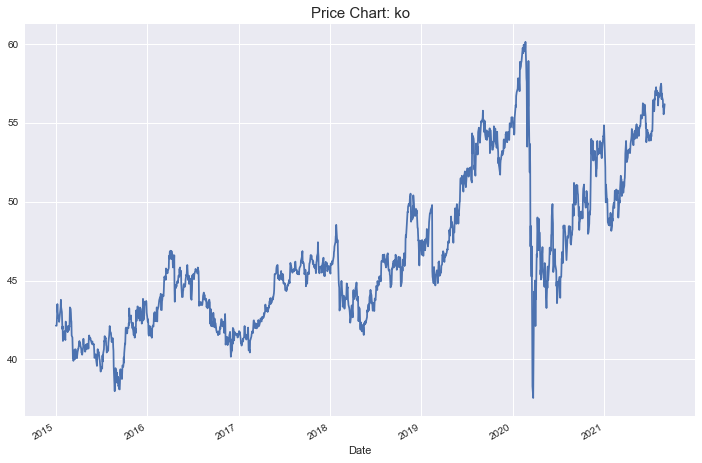

In [75]:
stock.plot_prices()

1. What has happened here is that Child's representation method has overwritten the parent's representation method
2. A simple rule is that whenever the child class has a method with very same name as parent method, then the child's method prevails, e.g. in this case the dunder repr method
3. Sometimes there are good reasons to use inheritance, in particular cases where we have a base class which introduces some workflows which are required for many other workflows. Then we can inherit this base class to other more specialised classes
4. Inheritance can improve readability and user experience
5. When there is an empty bracket in a class, it simply means that class does not inherit from other classes. It is not necessary to use brackets in parent class, but it is always a good practice to do so

# Inheritance and the super() Function
Parent Class is also called super class. super() function gives acces to methods from parent class to child class. Very useful in cases where we do not want the child class to overwrite methods from super class. e.g. dunder init method from parent class

In [81]:
# defining dunder init method in child class, and adding a frequency attribute in instantiation stage
# If we do not use the super() function, the dunder init method of child class overwrites the dunder init method from 
# parent class, and damages the functionality

class RiskReturn(FinancialInstrumentBase): 
    
    def __init__(self, ticker, start, end, freq = None): # Adding a frequency attribute
        self.freq = freq
        super().__init__(ticker, start, end) # a temporary object which allows to call dunder init from parent class
    
    def __repr__(self):
        return 'RiskReturn(ticker = {}, start = {}, end = {})'.format(self._ticker, self.start, self.end)
    
    def mean_return(self): # Since we have freq already in the attribute, we do not need it here
        if self.freq is None: # changing freq to self.freq
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(self.freq).last() # changing freq to self.freq
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self):  # Since we have freq already in the attribute, we do not need it here
        if self.freq is None: # changing freq to self.freq
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(self.freq).last() # changing freq to self.freq
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print ('Return: {} | Risk: {}'.format (mean_return, risk))

In [82]:
# Let us try and see if it works
stock = RiskReturn('dow', '2015-01-01', '2021-08-31', freq = 'w')

[*********************100%***********************]  1 of 1 completed


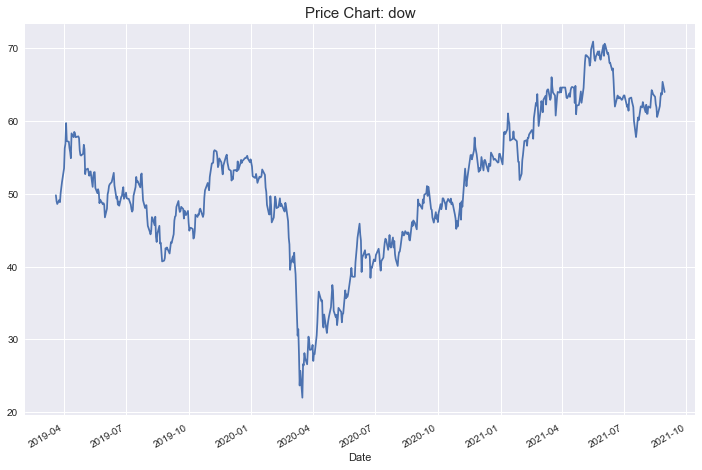

In [84]:
stock.plot_prices()

In [85]:
stock

RiskReturn(ticker = dow, start = 2015-01-01, end = 2021-08-31)

In [86]:
stock.mean_return()

0.0021480236551313695

In [87]:
stock.annualized_perf()

Return: 0.102 | Risk: 0.473


# Adding meaningful Docstrings
1. Really helpful for users and co-developers to guide them what they are doing. 
2. Docstrings are written manual that guide users through the purpose and functionalities of classes and methods. 
3. They should be concise and understandable for external users
4. Choose the markdown option to write docstrings easily within lines of code
5. Docstrings always start and end with a triple quote '''
6. Docstring starts with an indent under def
7. The level of detail depends on complexity of the classes and also the target audience. If plan is to make the library public for wider use and for inexperienced users, it should be more detailed. A good way is to assume that the target user is starting from 0, and then proceed from there

In [89]:
# Adding docstrings to our class
class FinancialInstrumentBase():
    ''' Class for analyzing Financial Instruments like stocks.

    Attributes
    ==========
    ticker: str
        ticker symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval

    Methods
    =======
    get_data:
        retrieves daily price data (from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart
    plot_returns:
        plots log returns either as time series ("ts") or histogram ("hist")
    set_ticker:
        sets a new ticker
    '''
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return 'FinancialInstrument(ticker = {}, start = {}, end = {})'.format(self._ticker, self.start, self.end)

    def get_data(self): 
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {'Close':'price'}, inplace = True)
        self.data = raw 
        
    def log_returns(self):
        self.data['log_returns'] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12,8))
        plt.title('Price Chart: {}'.format(self._ticker), fontsize = 15) 
        
    def plot_returns(self, kind = 'ts'): 
        ''' plots log returns either as time series ('ts') or as histogram ('hist')
        '''
        if kind == 'ts':
            self.data.log_returns.plot(figsize = (12,8))
            plt.title('Returns: {}'.format(self._ticker), fontsize = 15)
        
        elif kind == 'hist':
            self.data.log_returns.hist(figsize = (12,8), bins = int(np.sqrt(len(self.data))))
            plt.title('Frequency of Returns: {}'.format(self._ticker), fontsize = 15)
            
    def set_ticker(self, ticker = None):
        '''sets a new ticker
        '''
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

# Final Version of our class
1. If we want to use this class in other notebooks, it is not optimal to copy and paste the whole class. Instead of that we can just import it like we import other libraries such as numpy or pandas
2. We can create a python module in .py format with class FinancialInstrument and import the module and class
3. One option is to convert the jupyter notebook to a .py file. Download as -> .py file
4. The .py file and the the new file where it is being imported, should exist in the same directory

In [90]:
class FinancialInstrument():
    ''' Class for analyzing Financial Instruments like stocks.

    Attributes
    ==========
    ticker: str
        ticker symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval

    Methods
    =======
    get_data:
        retrieves daily price data (from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart
    plot_returns:
        plots log returns either as time series ("ts") or histogram ("hist")
    set_ticker:
        sets a new ticker
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns (risk)
    annualized_perf:
        calculates annulized return and risk
    '''
    
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        ''' retrieves (from yahoo finance) and prepares the data
        '''
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        '''calculates log returns
        '''
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        ''' creates a price chart
        '''
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self.ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self.ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        '''sets a new ticker
        '''
        if ticker is not None:
            self.ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        '''calculates mean return
        '''
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        '''calculates the standard deviation of returns (risk)
        '''
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        '''calculates annulized return and risk
        '''
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))